# AIT526 Individual Lab 2
##### Charles Belinky

## Task 1: Text Summarization with Word Frequencies

In [12]:
# 1.1

from bs4 import BeautifulSoup
import requests

def get_page_content(url):
    """
    Retrieve and extract the content of a webpage.

    Args:
        url (str): The URL of the webpage.

    Returns:
        str: The extracted content in lowercase.
    """
    result = ""  # Initialize an empty string to store the content

    # Send a request to the URL to retrieve the page content
    page = requests.get(url)

    # Create a BeautifulSoup object to parse the HTML content
    soup = BeautifulSoup(page.content, "lxml")

    # Find the element with id="content"
    content = soup.find(id="content")

    # Find all paragraph elements within the content
    pars = content.find_all("p")

    # Iterate through each paragraph and append its text to the result
    for p in pars:
        result += p.text

    # Convert the result to lowercase and return it
    return result.lower()

# Define the URL of the webpage to scrape
URL = "https://en.wikipedia.org/wiki/Natural_language_processing"

# Call the function to get the content of the webpage
content = get_page_content(URL)

# Print the extracted content
print(content)


natural language processing (nlp) is an interdisciplinary subfield of computer science and linguistics. it is primarily concerned with giving computers the ability to support and manipulate speech. it involves processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e. statistical and, most recently, neural network-based) machine learning approaches. the goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. the technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.
challenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation.
natural language processing has its roots in the 1950s. already in 1950, alan turing published an article titled "computing machinery and int

In [13]:
# 1.2

from nltk import wordpunct_tokenize
import string
from nltk.corpus import stopwords

def remove_punctuation(txt):
    """
    Remove punctuation from a given text.

    Args:
        txt (str): Input text.

    Returns:
        str: Text with punctuation removed.
    """
    return "".join([c for c in txt if c not in string.punctuation])

def get_clean_words(text):
    """
    Get a list of clean words from a text.

    Args:
        text (str): Input text.

    Returns:
        list: List of clean words.
    """
    
    # Get English stopwords
    stop_words = stopwords.words("english")
    
    # Tokenize the text
    words = wordpunct_tokenize(text)
    
    # Remove punctuation
    words = [remove_punctuation(word) for word in words if remove_punctuation(word)!=""]
    
    # Remove stopwords and specific words such as "e.g."
    words = [word for word in words if word not in stop_words+["e","g"]]
    
    return words

# Apply cleaning and preprocessing to 'content'
words = get_clean_words(content)

# Print the first 20 cleaned words
print(words[0:20])


['natural', 'language', 'processing', 'nlp', 'interdisciplinary', 'subfield', 'computer', 'science', 'linguistics', 'primarily', 'concerned', 'giving', 'computers', 'ability', 'support', 'manipulate', 'speech', 'involves', 'processing', 'natural']


In [14]:
# 1.3

from nltk.probability import FreqDist

def calc_words_freq(words):
    """
    Calculate the frequency of each word and normalize the frequencies.

    Args:
        words (list): List of words.

    Returns:
        nltk.probability.FreqDist: Frequency distribution of words.
    """
    
    # Create a frequency distribution object
    fdist_words = FreqDist(words)
    
    # Get the frequency of the most common word
    max_count = fdist_words.most_common(1)[0][1]
    for word in fdist_words.keys():
        fdist_words[word] = fdist_words[word] / max_count  # Normalize frequencies
    return fdist_words

# Calculate and normalize word frequencies
words_frequency = calc_words_freq(words)

# Print the 20 most common words along with their normalized frequencies
print(words_frequency.most_common(20))


[('language', 1.0), ('natural', 0.6956521739130435), ('nlp', 0.6521739130434783), ('cognitive', 0.5652173913043478), ('processing', 0.5217391304347826), ('linguistics', 0.391304347826087), ('based', 0.391304347826087), ('tasks', 0.391304347826087), ('approach', 0.391304347826087), ('statistical', 0.34782608695652173), ('neural', 0.30434782608695654), ('machine', 0.30434782608695654), ('learning', 0.2608695652173913), ('approaches', 0.2608695652173913), ('rules', 0.2608695652173913), ('speech', 0.21739130434782608), ('rule', 0.21739130434782608), ('understanding', 0.17391304347826086), ('intelligence', 0.17391304347826086), ('symbolic', 0.17391304347826086)]


In [15]:
# 1.4

from nltk import sent_tokenize

def score_sentence(sentence):
    """
    Score a sentence based on the frequency of its words.

    Args:
        sentence (str): Input sentence.

    Returns:
        float: Sentence score.
    """
    
    # Tokenize and convert to lowercase
    words = wordpunct_tokenize(sentence.lower())
    
    score = 0

    # Calculate the score for the sentence
    for word in words:
        if word in words_frequency.keys():  # Check if the word is in the frequency distribution
            score += words_frequency[word]  # Add the normalized frequency to the score

    return score

# Tokenize the content into sentences
sentences = sent_tokenize(content)
sent_dict = {}

# Loop through each sentence and score it
for sentence in sentences:
    score = score_sentence(sentence)  # Score the sentence
    sent_dict[sentence] = score  # Store the sentence and its score in a dictionary

# Sort sentences based on their scores in descending order
sent_dict = {key: value for key, value in sorted(sent_dict.items(), key=lambda item: item[1], reverse=True)}
sent_dict


{'as an example, george lakoff offers a methodology to build natural language processing (nlp) algorithms through the perspective of cognitive science, along with the findings of cognitive linguistics,[47] with two defining aspects:\nties with cognitive linguistics are part of the historical heritage of nlp, but they have been less frequently addressed since the statistical turn during the 1990s.': 7.913043478260872,
 'machine learning approaches, which include both statistical and neural networks, on the other hand, have many advantages over the symbolic approach: \nalthough rule-based systems for manipulating symbols were still in use in 2020, they have become mostly obsolete with the advance of llms in 2023. \nbefore that they were commonly used:\nin the late 1980s and mid-1990s, the statistical approach ended a period of ai winter, which was caused by the inefficiencies of the rule-based approaches.': 6.5652173913043494,
 'challenges in natural language processing frequently involv

In [18]:
# 1.5

def sentence_count_summary(sentence_count):
    """
    Generate a summary with a specified number of top-scoring sentences.

    Args:
        sentence_count (int): Number of sentences to include in the summary.

    Returns:
        str: Generated summary.
    """
    
    result = ""  # Initialize an empty string to store the summary
    i = 0  # Initialize a counter for the selected sentences

    # Iterate through the sentences and their scores in 'sent_dict'
    for sentence, score in sent_dict.items():
        if i >= sentence_count:  # If the desired number of sentences is reached, exit loop
            break

        if result != "":  # Add a newline character if it's not the first sentence
            result += "\n"
        
        result += sentence  # Add the sentence to the summary
        i += 1  # Increment the counter

    return result  # Return the generated summary


def word_count_summary(word_count):
    """
    Generate a summary with a specified number of words.

    Args:
        word_count (int): Number of words to include in the summary.

    Returns:
        str: Generated summary.
    """
    
    result = ""  # Initialize an empty string to store the summary
    sent_index = 0  # Initialize the index of the current sentence
    word_index = 0  # Initialize the index of the current word within the sentence
    word_counter = 0  # Initialize a counter for the selected words
    sent_words = []  # List to store the words of the current sentence
    space = ""  # Initialize a variable to handle spaces between words
    new_line = ""  # Initialize a variable to handle new lines between sentences

    sentences = list(sent_dict)  # Convert the sentences in 'sent_dict' to a list

    # Continue until the desired word count is reached
    while word_counter < word_count:
        if len(sent_words) == 0:
            # If there are no remaining words in the current sentence, tokenize the next sentence
            sent_words = wordpunct_tokenize(sentences[sent_index])
            word_index = 0
            space = ""
            if len(result) > 0:
                new_line = "\n"
        
        if word_index < len(sent_words):
            # If there are remaining words in the current sentence, add them to the summary
            result += new_line + space + sent_words[word_index]
            word_index += 1
            word_counter += 1
            space = " "
            new_line = ""
        else:
            # If all words in the current sentence are used, move to the next sentence
            sent_words = []
            sent_index += 1

    return result  # Return the generated summary


def percentage_summary(percentage):
    """
    Generate a summary based on a specified percentage of total words.

    Args:
        percentage (float): Percentage of total words to include in the summary.

    Returns:
        str: Generated summary.
    """
    
    total_words = len(words)  # Get the total number of words in 'words'
    word_count = (percentage/100)*total_words  # Calculate the desired word count based on the percentage
    return word_count_summary(word_count)  # Generate a summary using 'word_count_summary'


print("summary based on sentance count: ")
print(sentence_count_summary(2))
print("\n\n\nsummary based on word count: ")
print(word_count_summary(100))
print("\n\n\nsummary based on percentage: ")
print(percentage_summary(15))

summary based on sentance count: 
as an example, george lakoff offers a methodology to build natural language processing (nlp) algorithms through the perspective of cognitive science, along with the findings of cognitive linguistics,[47] with two defining aspects:
ties with cognitive linguistics are part of the historical heritage of nlp, but they have been less frequently addressed since the statistical turn during the 1990s.
machine learning approaches, which include both statistical and neural networks, on the other hand, have many advantages over the symbolic approach: 
although rule-based systems for manipulating symbols were still in use in 2020, they have become mostly obsolete with the advance of llms in 2023. 
before that they were commonly used:
in the late 1980s and mid-1990s, the statistical approach ended a period of ai winter, which was caused by the inefficiencies of the rule-based approaches.



summary based on word count: 
as an example , george lakoff offers a method

## Task 2: Text Summarization with N-grams

In [20]:
# 2.1

from nltk import ngrams, word_tokenize

def generate_ngrams(text, n):
    """
    Generate n-grams from a given text.

    Args:
        text (str): Input text.
        n (int): Number of words in each n-gram.

    Returns:
        list: List of n-grams.
    """
    
    # Tokenize the text and convert to lowercase, then generate n-grams
    n_grams = ngrams(word_tokenize(text.lower()), n)
    
    # Join the generated n-grams into a list of strings
    return [' '.join(grams) for grams in n_grams]


n2_grams = generate_ngrams(content, 2)
print("\nbi-grams:")
print(n2_grams[0:20])

n3_grams = generate_ngrams(content, 3)
print("\ntri-grams:")
print(n3_grams[0:20])

n4_grams = generate_ngrams(content, 4)
print("\n4-grams:")
print(n4_grams[0:20])


bi-grams:
['natural language', 'language processing', 'processing (', '( nlp', 'nlp )', ') is', 'is an', 'an interdisciplinary', 'interdisciplinary subfield', 'subfield of', 'of computer', 'computer science', 'science and', 'and linguistics', 'linguistics .', '. it', 'it is', 'is primarily', 'primarily concerned', 'concerned with']

tri-grams:
['natural language processing', 'language processing (', 'processing ( nlp', '( nlp )', 'nlp ) is', ') is an', 'is an interdisciplinary', 'an interdisciplinary subfield', 'interdisciplinary subfield of', 'subfield of computer', 'of computer science', 'computer science and', 'science and linguistics', 'and linguistics .', 'linguistics . it', '. it is', 'it is primarily', 'is primarily concerned', 'primarily concerned with', 'concerned with giving']

4-grams:
['natural language processing (', 'language processing ( nlp', 'processing ( nlp )', '( nlp ) is', 'nlp ) is an', ') is an interdisciplinary', 'is an interdisciplinary subfield', 'an interdis

<FreqDist with 1279 samples and 1328 outcomes>
[('natural language processing', 9), ('in natural language', 4), ('language processing .', 4), ('( e.g. ,', 3), (', e.g. ,', 3), ('grammar , [', 3), ('language processing (', 2), ('processing ( nlp', 2), ('( nlp )', 2), ('is an interdisciplinary', 2), ('and linguistics .', 2), (', such as', 2), (') machine learning', 2), ('machine learning approaches', 2), ('at the time', 2), ('of natural language', 2), ('natural language .', 2), ('of symbolic nlp', 2), ('in the late', 2), ('the late 1980s', 2)]


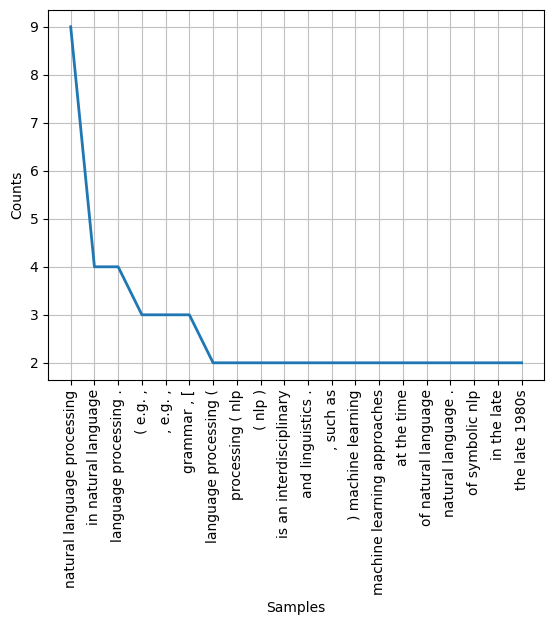

In [23]:
# 2.2.a

import matplotlib.pyplot as plt

def process_n_grams(n):
    """
    Process n-grams and generate frequency distribution.

    Args:
        n (int): Number of words in each n-gram.
    """
    
    n_grams = generate_ngrams(content, n)  # Generate n-grams
    fdist_n_grams = FreqDist(n_grams)  # Calculate frequency distribution

    print(fdist_n_grams)  # Print the frequency distribution
    print(fdist_n_grams.most_common(20))  # Print the most common n-grams

    fdist_n_grams.plot(20)  # Plot the frequency distribution
    plt.show()  # Show the plot

process_n_grams(3)  # Process tri-grams


In [24]:
# 2.2.b

def find_weighted_freq(freq_dist):
    """
    Find weighted frequencies based on the maximum frequency.

    Args:
        freq_dist (nltk.probability.FreqDist): Frequency distribution.

    Returns:
        nltk.probability.FreqDist: Weighted frequency distribution.
    """
    
    max_count = freq_dist.most_common(1)[0][1]  # Get the frequency of the most common item
    new_freq = freq_dist.copy()  # Create a copy of the original frequency distribution

    # Iterate through the items in the frequency distribution
    for key, value in freq_dist.items():
        new_freq[key] = value / max_count  # Weight the frequency based on the maximum frequency

    return new_freq  # Return the new weighted frequency distribution

fdist_3grams = FreqDist(n3_grams)
x = find_weighted_freq(fdist_3grams)
x

FreqDist({'natural language processing': 1.0, 'in natural language': 0.4444444444444444, 'language processing .': 0.4444444444444444, '( e.g. ,': 0.3333333333333333, ', e.g. ,': 0.3333333333333333, 'grammar , [': 0.3333333333333333, 'language processing (': 0.2222222222222222, 'processing ( nlp': 0.2222222222222222, '( nlp )': 0.2222222222222222, 'is an interdisciplinary': 0.2222222222222222, ...})

In [25]:
# 2.2.c

def calc_sentence_score_ngram(sent_tokens, ngram_freqs, n_grams):
    """
    Calculate scores for sentences based on n-gram frequencies.

    Args:
        sent_tokens (list): List of tokenized sentences.
        ngram_freqs (nltk.probability.FreqDist): Frequency distribution of n-grams.
        n_grams (int): Number of words in each n-gram.

    Returns:
        dict: Dictionary of sentence scores.
    """
    
    sentence_scores = {}  # Initialize a dictionary to store sentence scores
    freqs = find_weighted_freq(ngram_freqs)  # Get weighted frequencies of n-grams

    for sent in sent_tokens:  # Iterate through the tokenized sentences
        sent_n_grams = generate_ngrams(sent.lower(), n_grams)  # Generate n-grams for the sentence
        for ngram in sent_n_grams:  # Iterate through the n-grams in the sentence
            if ngram in freqs.keys():  # Check if the n-gram is in the frequency distribution
                if sent not in sentence_scores.keys():  # If the sentence is not in the scores dictionary
                    sentence_scores[sent] = freqs[ngram]  # Initialize the score with the n-gram frequency
                else:
                    sentence_scores[sent] += freqs[ngram]  # Add the n-gram frequency to the existing score

    return sentence_scores  # Return the dictionary of sentence scores

n_grams = 3
ngram_freqs = FreqDist(generate_ngrams(content, n_grams))
sentence_scores = calc_sentence_score_ngram(sentences, ngram_freqs, n_grams)
sentence_scores


{'natural language processing (nlp) is an interdisciplinary subfield of computer science and linguistics.': 3.000000000000001,
 'it is primarily concerned with giving computers the ability to support and manipulate speech.': 1.4444444444444449,
 'it involves processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e.': 2.444444444444445,
 'statistical and, most recently, neural network-based) machine learning approaches.': 1.4444444444444446,
 'the goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.': 2.5555555555555562,
 'the technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.': 2.333333333333334,
 'challenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation

In [26]:
# 2.2.d

from heapq import nlargest

def ngram_summary_based_on_sentence_count(n_grams, sentence_count):
    """
    Generate a summary based on a specified number of sentences using n-grams.

    Args:
        n_grams (int): Number of words in each n-gram.
        sentence_count (int): Number of sentences to include in the summary.

    Returns:
        str: Generated summary.
    """
    
    ngram_freqs = FreqDist(generate_ngrams(content, n_grams))  # Generate n-grams and get their frequencies
    sentence_scores = calc_sentence_score_ngram(sentences, ngram_freqs, n_grams)  # Calculate sentence scores

    # Select the top 'sentence_count' sentences based on their scores
    summary_sentences = nlargest(sentence_count, sentence_scores, key=sentence_scores.get)

    # Join the selected sentences to form the summary
    result = " ".join(summary_sentences)

    return result  # Return the generated summary


print(ngram_summary_based_on_sentence_count(3,3))

machine learning approaches, which include both statistical and neural networks, on the other hand, have many advantages over the symbolic approach: 
although rule-based systems for manipulating symbols were still in use in 2020, they have become mostly obsolete with the advance of llms in 2023. 
before that they were commonly used:
in the late 1980s and mid-1990s, the statistical approach ended a period of ai winter, which was caused by the inefficiencies of the rule-based approaches. nevertheless, approaches to develop cognitive models towards technically operationalizable frameworks have been pursued in the context of various frameworks, e.g., of cognitive grammar,[49] functional grammar,[50] construction grammar,[51] computational psycholinguistics and cognitive neuroscience (e.g., act-r), however, with limited uptake in mainstream nlp (as measured by presence on major conferences[52] of the acl). as an example, george lakoff offers a methodology to build natural language processin

## Task 3: Comparisons

Text summarization using word frequencies (approach 1) focuses on the frequency of individual words in the text by calculating the frequency of each word in the text and using it to identify important words. The main advantage of this approach is that it is easy to implement and the resulting summary is based on individual words, making it easy to understand. A negative of using word frequencies is that it may fail to capture the context or relationships between words.

On the other hand, text summarization using N-grams considers sequences of n words (n-grams) to capture context and relationships by generating n-grams and analyzing their frequency and importance in the text. This approach better captures the context in which words appear, providing more contextual information. N-grams handle synonyms or word variations better than word frequencies alone.